# Geocoding and routing application using open source python libraries
-------

<br>

This coursework was made under the framework of __Practice Software development 22S - University of Salzburg__

Github repository: [https://github.com/cmmarellano/PLUS_softwaredev_2022_FinalProject](https://github.com/cmmarellano/PLUS_softwaredev_2022_FinalProject)

(August 2022)

Authors: 
- __Carla Arellano [@cmmarellano](https://github.com/cmmarellano)__ 
- __Kennedy Adriko [adken](https://www.github.com/adken)__ <br><br>



##### The workflow order is as follows:
1. Import libraries
2. Import addresses
3. Geocode addresses
4. Plot addresses
5. Get start point from user location using IP address
6. Select start and end point to plot route
7. Compute and display optimal driving route, distance and time


In [1]:
import openrouteservice as ors
from openrouteservice.directions import directions
import folium
from folium.features import CustomIcon
import geopy
import leafmap
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import io

In [2]:
#pip install openrouteservice

##### API Key

In [25]:
# import config
# performs requests to the ORS API services
# client will be used in all examples
client = ors.Client(key='5b3ce3597851110001cf624889ce32dc9e8741dca14bd53556e3a687')

#### Import addresses

Import addresses in CSV file format 

In [4]:
upload = widgets.FileUpload(
        accept='*.csv',
        multiple=False)
display(upload)

FileUpload(value={}, accept='*.csv', description='Upload')

#### Data Cleaning 
Inspect the imported data and optimize it for geocoding

In [27]:
input_file = list(upload.value.values())[0]
content = input_file['content']
content = io.StringIO(content.decode('utf-8'))
df = pd.read_csv(content)
df

,Unnamed: 0,restaurant,street,zip,city,country
0,0,McDonalds,S-Bahnhof Alexanderplatz 1,10178,Berlin,Germany
1,1,McDonalds,U-Bahnhof Alexanderplatz 1,10178,Berlin,Germany
2,2,McDonalds,Europaplatz 1,10557,Berlin,Germany
3,3,McDonalds,Walther-Schreiber-Platz 1,12161,Berlin,Germany
4,4,McDonalds,Hansastr. 1,13053,Berlin,Germany
...,...,...,...,...,...,...
150,150,BK,85 GLOUCESTER ROAD,TW9 3BT,London,England
151,151,BK,90 WHITECHAPEL HIGH STREET,E1 7RA,London,England
152,152,BK,70-72 QUEENSWAY,W2 3RL,London,England
153,153,BK,250-252 EARLS COURT ROAD,SW5 9AD,London,England


In [7]:
# Merge street, zip and city fields into an address field Using DataFrame.apply() and lambda function

df["address"] = df["street"].map(str) + ', ' + df["zip"].map(str)+ ', ' + df["city"]+ ', ' +  df['country']
df.head()

,Unnamed: 0,restaurant,street,zip,city,country,address
0,0,McDonalds,S-Bahnhof Alexanderplatz 1,10178,Berlin,Germany,"S-Bahnhof Alexanderplatz 1, 10178, Berlin, Ger..."
1,1,McDonalds,U-Bahnhof Alexanderplatz 1,10178,Berlin,Germany,"U-Bahnhof Alexanderplatz 1, 10178, Berlin, Ger..."
2,2,McDonalds,Europaplatz 1,10557,Berlin,Germany,"Europaplatz 1, 10557, Berlin, Germany"
3,3,McDonalds,Walther-Schreiber-Platz 1,12161,Berlin,Germany,"Walther-Schreiber-Platz 1, 12161, Berlin, Germany"
4,4,McDonalds,Hansastr. 1,13053,Berlin,Germany,"Hansastr. 1, 13053, Berlin, Germany"


#### Geocode addresses
Geocode addresses using geopy library and Nominatim

In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [9]:
geolocator = Nominatim(user_agent="Practice_v1")

In [10]:
locator = Nominatim(user_agent="Practice_v1")

geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['address'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [11]:
df.head()

,Unnamed: 0,restaurant,street,zip,city,country,address,location,point
0,0,McDonalds,S-Bahnhof Alexanderplatz 1,10178,Berlin,Germany,"S-Bahnhof Alexanderplatz 1, 10178, Berlin, Ger...",None,None
1,1,McDonalds,U-Bahnhof Alexanderplatz 1,10178,Berlin,Germany,"U-Bahnhof Alexanderplatz 1, 10178, Berlin, Ger...",None,None
2,2,McDonalds,Europaplatz 1,10557,Berlin,Germany,"Europaplatz 1, 10557, Berlin, Germany","(Europaplatz 1, 10557 Berlin, Europaplatz, Moa...","(52.5257446, 13.3685935, 0.0)"
3,3,McDonalds,Walther-Schreiber-Platz 1,12161,Berlin,Germany,"Walther-Schreiber-Platz 1, 12161, Berlin, Germany","(Schloss-Straßen-Center, 1, Walther-Schreiber-...","(52.46544755, 13.327684176306294, 0.0)"
4,4,McDonalds,Hansastr. 1,13053,Berlin,Germany,"Hansastr. 1, 13053, Berlin, Germany","(1, Hansastraße, Alt-Hohenschönhausen, Lichten...","(52.5470223, 13.4684079, 0.0)"


Drop any colummns with null coordinate values

In [12]:
df1 = df.dropna()
df1.head()

,Unnamed: 0,restaurant,street,zip,city,country,address,location,point
2,2,McDonalds,Europaplatz 1,10557,Berlin,Germany,"Europaplatz 1, 10557, Berlin, Germany","(Europaplatz 1, 10557 Berlin, Europaplatz, Moa...","(52.5257446, 13.3685935, 0.0)"
3,3,McDonalds,Walther-Schreiber-Platz 1,12161,Berlin,Germany,"Walther-Schreiber-Platz 1, 12161, Berlin, Germany","(Schloss-Straßen-Center, 1, Walther-Schreiber-...","(52.46544755, 13.327684176306294, 0.0)"
4,4,McDonalds,Hansastr. 1,13053,Berlin,Germany,"Hansastr. 1, 13053, Berlin, Germany","(1, Hansastraße, Alt-Hohenschönhausen, Lichten...","(52.5470223, 13.4684079, 0.0)"
5,5,McDonalds,Hanne-Sobek-Platz 1,13357,Berlin,Germany,"Hanne-Sobek-Platz 1, 13357, Berlin, Germany","(Hanne-Sobek-Platz, Gesundbrunnen, Mitte, Berl...","(52.5490394, 13.3874026, 0.0)"
6,6,McDonalds,Grunerstr. 20,10179,Berlin,Germany,"Grunerstr. 20, 10179, Berlin, Germany","(Alexa, 20, Grunerstraße, Mitte, Berlin, 10179...","(52.51907225, 13.416015406346249, 0.0)"


In [13]:
df1.shape

(136, 9)

In [14]:
# split point column into latitude, longitude and altitude columns
df1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df1['point'].tolist(), index=df1.index)
df1.head()

,Unnamed: 0,restaurant,street,zip,city,country,address,location,point,latitude,longitude,altitude
2,2,McDonalds,Europaplatz 1,10557,Berlin,Germany,"Europaplatz 1, 10557, Berlin, Germany","(Europaplatz 1, 10557 Berlin, Europaplatz, Moa...","(52.5257446, 13.3685935, 0.0)",52.525745,13.368593,0.0
3,3,McDonalds,Walther-Schreiber-Platz 1,12161,Berlin,Germany,"Walther-Schreiber-Platz 1, 12161, Berlin, Germany","(Schloss-Straßen-Center, 1, Walther-Schreiber-...","(52.46544755, 13.327684176306294, 0.0)",52.465448,13.327684,0.0
4,4,McDonalds,Hansastr. 1,13053,Berlin,Germany,"Hansastr. 1, 13053, Berlin, Germany","(1, Hansastraße, Alt-Hohenschönhausen, Lichten...","(52.5470223, 13.4684079, 0.0)",52.547022,13.468408,0.0
5,5,McDonalds,Hanne-Sobek-Platz 1,13357,Berlin,Germany,"Hanne-Sobek-Platz 1, 13357, Berlin, Germany","(Hanne-Sobek-Platz, Gesundbrunnen, Mitte, Berl...","(52.5490394, 13.3874026, 0.0)",52.549039,13.387403,0.0
6,6,McDonalds,Grunerstr. 20,10179,Berlin,Germany,"Grunerstr. 20, 10179, Berlin, Germany","(Alexa, 20, Grunerstraße, Mitte, Berlin, 10179...","(52.51907225, 13.416015406346249, 0.0)",52.519072,13.416015,0.0


In [15]:
df1= df1.drop(['street', 'zip', 'city', 'point'], axis=1)

In [16]:
df1.head()

,Unnamed: 0,restaurant,country,address,location,latitude,longitude,altitude
2,2,McDonalds,Germany,"Europaplatz 1, 10557, Berlin, Germany","(Europaplatz 1, 10557 Berlin, Europaplatz, Moa...",52.525745,13.368593,0.0
3,3,McDonalds,Germany,"Walther-Schreiber-Platz 1, 12161, Berlin, Germany","(Schloss-Straßen-Center, 1, Walther-Schreiber-...",52.465448,13.327684,0.0
4,4,McDonalds,Germany,"Hansastr. 1, 13053, Berlin, Germany","(1, Hansastraße, Alt-Hohenschönhausen, Lichten...",52.547022,13.468408,0.0
5,5,McDonalds,Germany,"Hanne-Sobek-Platz 1, 13357, Berlin, Germany","(Hanne-Sobek-Platz, Gesundbrunnen, Mitte, Berl...",52.549039,13.387403,0.0
6,6,McDonalds,Germany,"Grunerstr. 20, 10179, Berlin, Germany","(Alexa, 20, Grunerstraße, Mitte, Berlin, 10179...",52.519072,13.416015,0.0


#### Plot addresses
Plot geocoded addresses using folium and leafmap mapping libraries

In [17]:
map1 = folium.Map(
    location=[50.1109,8.6821],
    tiles='openstreetmap',
    zoom_start=6,
)

df1.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [18]:
Map = leafmap.Map(center=(50.1109,8.6821), zoom=5)
# Map.add_xy_data(df1, x="longitude", y="latitude", layer_name="restaurants")
Map

Map(center=[50.1109, 8.6821], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

#### Routing from start point to end point
Implement routing using openroutes service library


In [19]:
df1.address

2                  Europaplatz 1, 10557, Berlin, Germany
3      Walther-Schreiber-Platz 1, 12161, Berlin, Germany
4                    Hansastr. 1, 13053, Berlin, Germany
5            Hanne-Sobek-Platz 1, 13357, Berlin, Germany
6                  Grunerstr. 20, 10179, Berlin, Germany
                             ...                        
146     138 CAMDEN HIGH STREET, NW1 0LU, London, England
147             7 Harewood Ave, NW1 6JJ, London, England
150         85 GLOUCESTER ROAD, TW9 3BT, London, England
151    90 WHITECHAPEL HIGH STREET, E1 7RA, London, En...
152             70-72 QUEENSWAY, W2 3RL, London, England
Name: address, Length: 136, dtype: object

##### Get start point from user location
Get start point from user IP address using urllib library 


In [20]:
import json
from urllib.request import urlopen
url = 'http://ipinfo.io/json'
response = urlopen(url)
data = json.load(response)
# print(data)
location = data['loc']
lat, lon = location.split(',')
current_location = [float(lat), float(lon)]
current_location

[48.2085, 16.3721]

In [21]:
user_location = tuple(current_location)
user_location

(48.2085, 16.3721)

##### Select end point for routing
Specify an end point or destination from the dropdown list of geocoded addresses


In [22]:
end_dropdown = widgets.Dropdown(options=list(df1.address),
                                   value=list(df1.address)[-1],
                                   description='Destination:',
                                   disabled=False)
end_dropdown


Dropdown(description='Destination:', index=135, options=('Europaplatz 1, 10557, Berlin, Germany', 'Walther-Sch…

origin : *current location*  (48.2085, 16.3721)
destination : 70-72 QUEENSWAY, W2 3RL, London, England (-0.1874331, 51.512562)
Distance Travelled :  1484.88 km
Trip duration :  890.06 mins



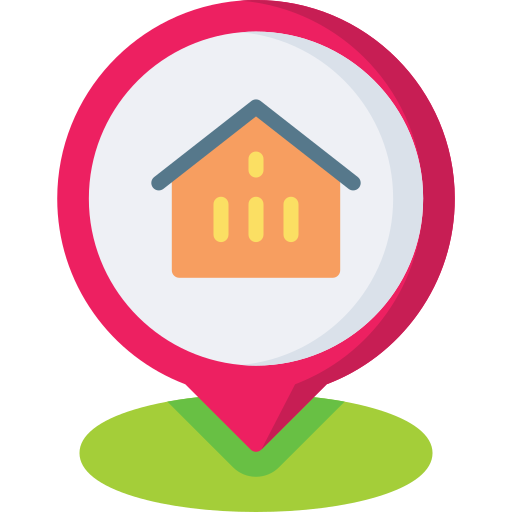
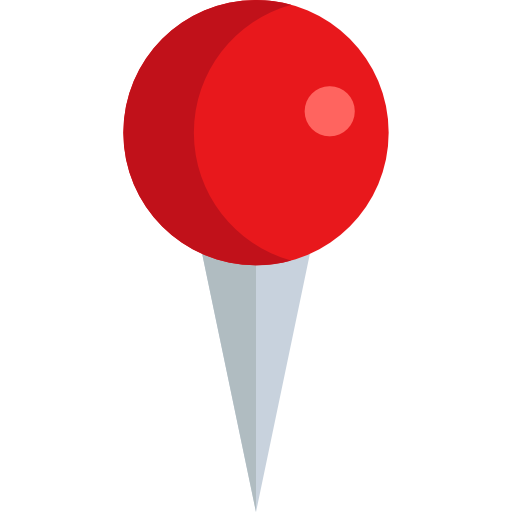

In [26]:
#user location address in str
starter = data['city']+ ', ' + data['region']+ ', '+data['country']
#store selected dropdown values
ender = end_dropdown.value


# # interaction between function and widget
# widgets.interact(get_coordinates, a=start_dropdown, b=end_dropdown);
def get_coordinates(starter, ender):
    start_lat = user_location[0]
    start_long = user_location[1]  
    end_lat = df1[df1.address == ender].latitude.values[0]
    end_long = df1[df1.address == ender].longitude.values[0]
    start, end = ((start_long, start_lat), (end_long, end_lat))
    return start, end

# call fn and return start, end coordinates
start_and_end = get_coordinates(user_location,ender)
# print(start_and_end)

print('origin : *current location* ',user_location)
print('destination :',ender, start_and_end[1])


#reverse zoom center point, refered from start coordinates. should be [lat lon]
start_loc = list(start_and_end[0])
start_loc[1],start_loc[0] = start_loc[0], start_loc[1]
end_loc = list(start_and_end[1])
end_loc[1],end_loc[0] = end_loc[0], end_loc[1]




# directions
route = client.directions(coordinates=start_and_end,
                          profile='driving-car', 
                          format='geojson')


def get_distance_and_time(route):
    level1 = route['features']
    level2 =list(level1)[0].get('properties')
    level3= level2.get('summary')
    #store distance traveled
    distance = level3.get('distance')
    #store trip duration
    duration = (level3.get('duration')/60)
    print('Distance Travelled : ', round(distance/1000,2), 'km')
    print('Trip duration : ', round(duration,2), 'mins')
    return distance, duration


#execute get_distance_time()
route_details = get_distance_and_time(route)
distance_traveled, time_traveled = route_details[0], route_details[1]


#custom icon
ico1_img = ('img/start_pin2.png')
ico2_img = ('img/end_pin.png')
start_icon =CustomIcon(
            ico1_img,
            icon_size=(50, 50))
end_icon =CustomIcon(
            ico2_img,
            icon_size=(40, 50))

#store markers coordinates and labels
start_pop = 'Start :\n\n' + starter
end_pop = 'Destination :\n\n' + ender
route_pop = 'Trip details :\n' + str(round(distance_traveled/1000,2)) + 'km' + '\n' + str(round(time_traveled,2)) + 'mins'
marks =[start_loc, end_loc]
marks_popup=[start_pop,end_pop]
marks_icon=[start_icon,end_icon]



#location wants lat lon
# define empty map
map_directions = folium.Map(location=start_loc, zoom_start=12.5)

# add geojson of route to map
folium.GeoJson(route, name='route',
              popup=route_pop).add_to(map_directions)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_directions)

# add markers on start and end
for i in range(len(marks)):
    folium.Marker(location=marks[i],
                  popup=marks_popup[i],
                 icon=marks_icon[i]).add_to(map_directions)

# display map
map_directions